#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
from random import sample #Used for random initialization
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy import linalg #Used for the "SVD" function

from IPython.display import Image

#### K-Means Algorithm Notes

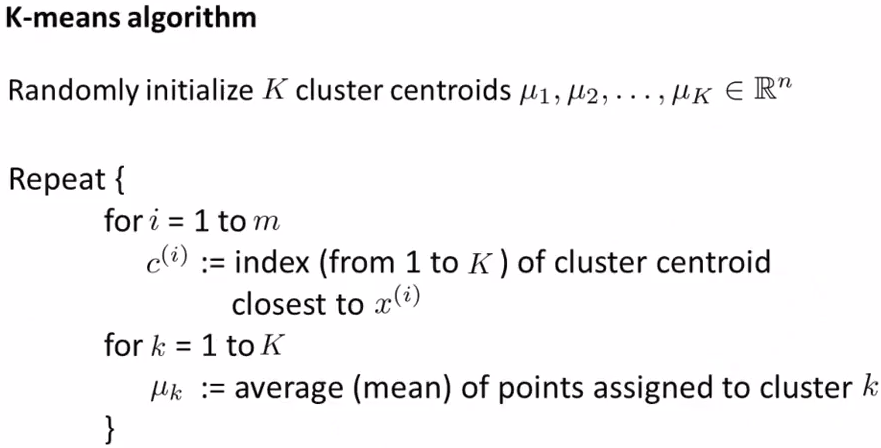

In [2]:
Image("K-Means_Algorithm.png", width=500, height=400)

#Step 1: Randomly initialize K cluster centroids.
#        First choose the number of clusters visually or with reason.
#        Randomly initialize many number, say 100 times. Pick the one that gives you the lowest cost.

#Step 2: Assign every data point to a cluster. This becomes the index vector. 
         #This process is repeated.

#Step 3: For every cluster, compute the mean of all the data points. This becomes the new centroid.
         #This process is repeated

#### Organizing the Data

In [3]:
datafile = 'ex7data2.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']

#X is 300 points, each has two coordinates
#X.shape = (300,2)

In [4]:
#Choose the number of centroids... K = 3
K = 3
#Choose the initial centroids matching ex7.m assignment script
initial_centroids = np.array([[3,3],[6,2],[8,5]])

#initial_centroids.shape = (3,2)
#initial_centroids[0] = taking the first array

#shape[0] = number of rows
#shape[1] = number of columns

#### Visualizing the Data

In [5]:
#Visualizing the data
def plot_data(myX,mycentroids,myidxs = None):

    """
    Function to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    #make sure number of coordinates in each data point == number of coordinates in each centroid
    assert myX[0].shape == mycentroids[0][0].shape
    
    assert mycentroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]): #for the number of rows in the 1st array of the centroid
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    #If idxs not supplied, then don't divide into colors
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Drawing a history of centroid movement
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

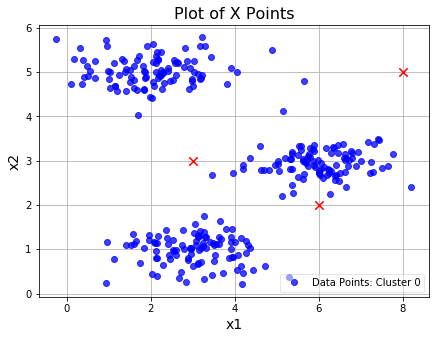

In [6]:
plot_data(X,[initial_centroids])

#### Finding the Closest Centroids

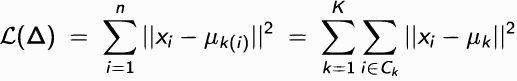

In [21]:
Image("K-Means_Cost_Function1.png", width=400, height=100)
#K-Means Cost Function:
#Minimize by the the sum of the squared distances between each observation and its closest centroid

In [22]:
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point2-point1))

#Picking the cluster centroid with the smallest squared distance to our training example

In [23]:
def findClosestCentroids(myX, mycentroids):
    """
    Function takes in the (m,n) X matrix
    (where m is the # of points, n is # of features per point)
    and the (K,n) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (m,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = np.zeros((myX.shape[0],1)) #shape = (300,1)~
    
    #Loop through each data point in X
    for x in range(idxs.shape[0]):
        mypoint = myX[x]
        #Compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in range(mycentroids.shape[0]): #looping through each centroid
            mycentroid = mycentroids[i]
            distsquared = distSquared(mycentroid,mypoint)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
        #With the best index found, modify the result idx vector
        idxs[x] = idx
        
    return idxs

    #idxs is the index vector. All the data points labelled by cluster.

In [24]:
idxs = findClosestCentroids(X,initial_centroids)

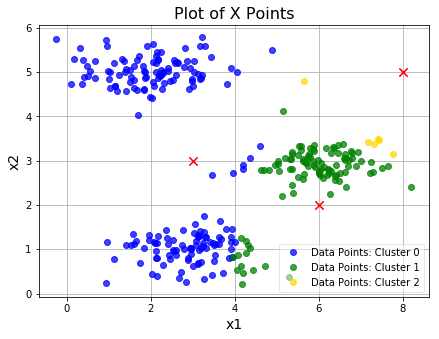

In [25]:
plot_data(X,[initial_centroids],idxs)

#### Computing centroid means

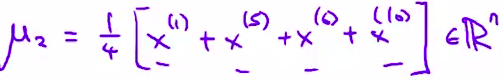

In [26]:
Image("New_centroid1.png", width=300, height=100)

In [27]:
def computeCentroids(myX, myidxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for x in range(len(np.unique(myidxs))): #looping through the number of unique clusters
        
        #subX.append will result in 3 arrays representing each training data for the 3 clusters
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    
    #For each cluster, compute the mean of all data points. This will be the new centroid.
    #Later in the runKMeans function, the new centroid will be iterated for optimization
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

#### K-means on example dataset

In [28]:
def runKMeans(myX, initial_centroids, K, n_iter):
    """
    Function that actually does the iterations
    """
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        
        #returns index vector given current centroid, idxs optimizes/ changes in each iteration
        idxs = findClosestCentroids(myX,current_centroids)
        
        #returns new centroid given the new index vector, centroid optimizes/ changes in each iteration
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [29]:
idxs, centroid_history = runKMeans(X,initial_centroids,K=3,n_iter=10)

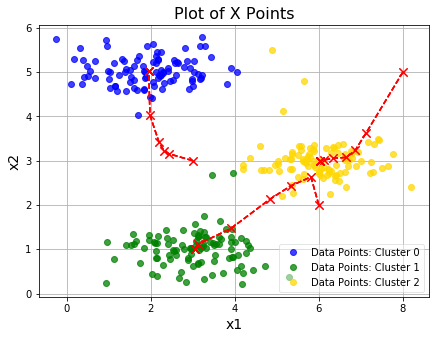

In [30]:
plot_data(X,centroid_history,idxs)

#### Random Initialization

In [31]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])

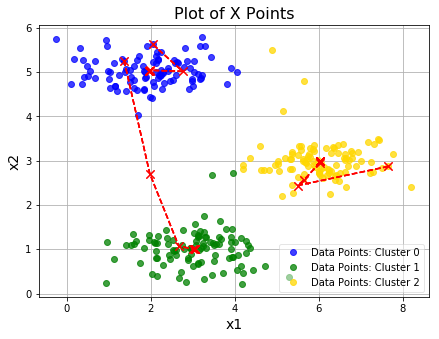

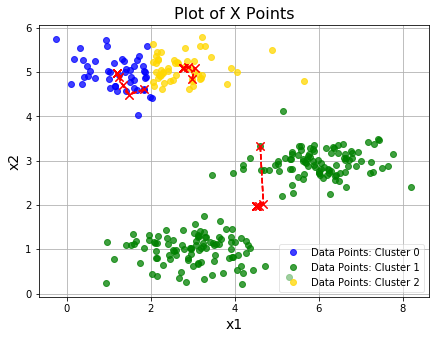

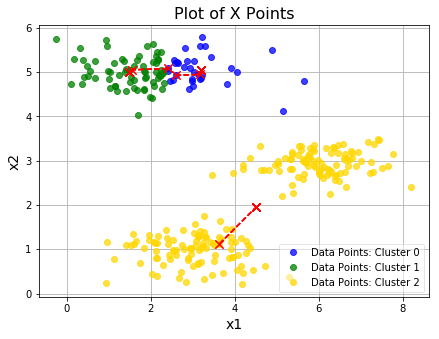

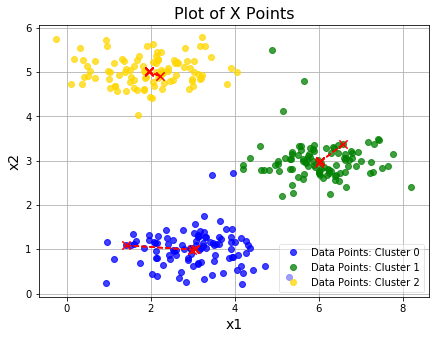

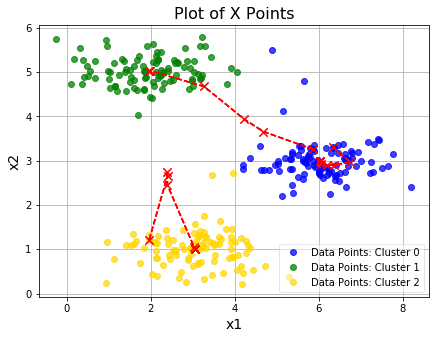

In [32]:
#Let's choose random initial centroids and see the resulting 
#centroid progression plot.. perhaps three times in a row
for x in range(5):
    idxs, centroid_history = runKMeans(X,chooseKRandomCentroids(X,K=3),
                                       K=3,n_iter=10)
    plot_data(X,centroid_history,idxs)